### **--- CS 512 --- COMPUTER VISION --- SECOND ASSIGNMENT**
___

### FALL 2024, DUE DATE: 9/29/2024

### ANTONIO CASTAÑARES, A20599898

___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

from scipy import ndimage

### ***First question***

**Add Gaussian Noise and Compute SNR:** Load a grayscale image and generate 10 noisy versions by adding Gaussian noise with a fixed standard deviation and zero mean. Compute the noise variance by calculating the pixel-wise standard deviation across the 10 noise images (without directly accessing the noise itself). Compute the signal power as the variance (square of the standard deviation) of the original grayscale image. Finally, calculate the SNR in dB using the ratio of the signal power to the noise power.

In [2]:
# Load the image and convert to grayscale
image = cv2.imread('madrid.jpg', cv2.IMREAD_GRAYSCALE)
image = image.astype(np.float32)                            # Convert to float for precise calculations

# Parameters for Gaussian noise
std_dev = 20                                                # Known standard deviation for Gaussian noise
mean = 0                                                    # Mean of the Gaussian noise
num_noisy_image = 10                                        # Number of noisy images to generate

# Generate 10 noisy versions of the grayscale image
noisy_images = []
for i in range(num_noisy_image):
    noise = np.random.normal(mean,std_dev,image.shape).astype(np.float32)
    noisy_image = np.clip(image + noise, 0, 255)            # Clip values to be in valid range
    noisy_images.append(noisy_image)

# Compute the noise power as the mean of the noise variance
noise_power = np.mean(np.var(noisy_images, axis = 0))
# Compute the signal power as the variance of the original image
signal_power = np.var(image)
# Compute the SNR in decibels (db)
SNR = 10 * np.log10(signal_power / noise_power)

# Comprobations
print("Noise_power:",noise_power)
print("signal_power:", signal_power)
print("SNR:",SNR)

Noise_power: 351.19327
signal_power: 2532.966
SNR: 8.580832


### ***Second question***

**Implement a convolution filter for smoothing:** Load a grayscale image. Implement a basic 3x3 convolution filter. Pad the image with zeros so that the convolution result has the same dimensions as the input. Define a basic 3x3 smoothing filter. Apply the filter to a grayscale image using your function and OpenCV's function, and compare the execution time. Display the original and smoothed images. Explain the performance difference between your implementation and OpenCV's convolution.

Manual convolution time: 2.00877 seconds
OpenCV convolution time: (zero padding): 0.17998 seconds


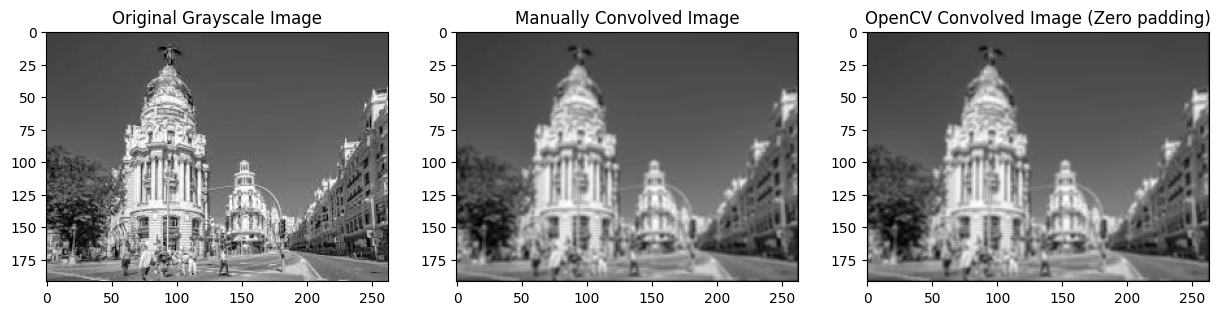

In [3]:
# Function for manual convolution using zero padding
def manual_convolution(image,kernel):
    # Dimentions of the image and the image and the kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros on the border
    padded_image = np.pad(image,((pad_height,pad_height), (pad_width,pad_width)),mode='constant')

    clear_output = np.zeros((image_height,image_width))
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i+kernel_height,j:j+kernel_width]

            clear_output[i,j] = np.sum(region * kernel)

    return clear_output

# Load the image and convert it to grayscale
image = cv2.imread('madrid.jpg', cv2.IMREAD_GRAYSCALE)

# Define a 3x3 averaging filter (kernel)
kernel = np.ones((3,3)) / 9.0

# Time the convolution implementations
start_manual = time.time()
smoothed_image_manual = manual_convolution(image,kernel)
end_manual = time.time()
start_opencv = time.time()
smoothed_image_opencv = cv2.filter2D(image,-1,kernel,borderType=cv2.BORDER_CONSTANT)
end_opencv = time.time()
print(f"Manual convolution time: {end_manual - start_manual:.5f} seconds")
print(f"OpenCV convolution time: (zero padding): {end_opencv - start_opencv:.5f} seconds")

# Display the original, manually convolved, and OpenCV-convolved images
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.title("Original Grayscale Image")
plt.subplot(1,3,2)
plt.imshow(smoothed_image_manual,cmap='gray')
plt.title("Manually Convolved Image")
plt.subplot(1,3,3)
plt.imshow(smoothed_image_opencv, cmap='gray')
plt.title("OpenCV Convolved Image (Zero padding)")
plt.show()

### Explication

My solution takes 3.25200 seconds compared to 0.56463 seconds of the OpenCV's convolution. A reason for this could be my solution uses two loops to go over each pixel in the image, which inefficient. Vectorization may be used to perfomr the same operation in parallel as pixels are processed simultaneously rather than pixel by pixel. I do not see significant differences in the picture.

### ***Third questions***

**Convolution with Stride:** Implement 3x3 convolution with a stride on a grayscale image. Experiment with different stride valuesand observe the differences in output.

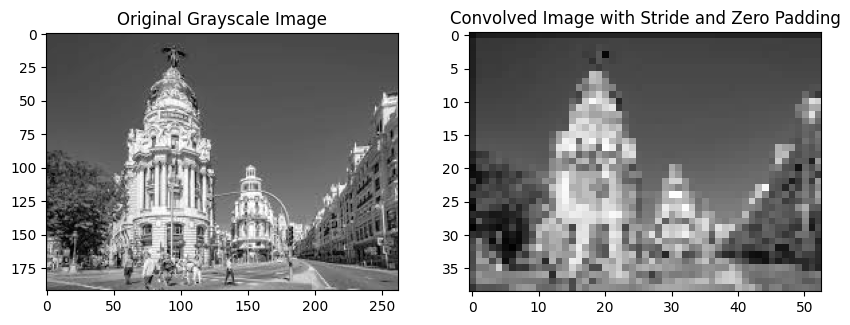

In [4]:
# Function for convolution with stride and zero padding, accepting kernel as argument
def convolution_with_stride(image,kernel,stride):
    # Dimentions of the image and the image and the kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # Pad the image with zeros on the border
    padded_image = np.pad(image,((pad_height,pad_height), (pad_width,pad_width)),mode='constant')

    # Output dimensions
    output_height = (image_height - kernel_height + 2 * pad_height) // stride + 1
    output_width = (image_width - kernel_width + 2 * pad_width) // stride + 1

    clear_output = np.zeros((output_height,output_width))
    for i in range(0,output_height):
        for j in range(0,output_width):
            region = padded_image[i*stride:i*stride+kernel_height,j*stride:j*stride+kernel_width]

            clear_output[i,j] = np.sum(region * kernel)

    return clear_output

# Load the image and convert it to grayscale
image = cv2.imread('madrid.jpg', cv2.IMREAD_GRAYSCALE)

# Define a 3x3 averaging filter (kernel) as an argument
kernel = np.ones((3,3)) / 9.0

# Apply the convolution 
smoothed_image_stride = convolution_with_stride(image,kernel,stride=5)

# Display the original, manually convolved, and OpenCV-convolved images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title("Original Grayscale Image")
plt.subplot(1,2,2)
plt.imshow(smoothed_image_stride,cmap='gray')
plt.title("Convolved Image with Stride and Zero Padding")
plt.show()

### Explication

If you increase the stride, the resolution of the image will reduce because a larger stride skips over more pixels.


### ***Fourth question***

**Compute and apply a Gaussian Smoothing Filter:** Compute an arbitrary size 2D Gaussian filter using the 2D Gaussian function. Print the Gaussian kernel. Apply the kernel to a grayscale image and display the result. Determine what the maximum allowed standard deviation (stdv) should be for a 5x5 filter, and explain your reasoning.

Gaussian Kernel (5x5): 
 [[9.25454935e-05 1.97618764e-03 5.48259056e-03 1.97618764e-03
  9.25454935e-05]
 [1.97618764e-03 4.21988954e-02 1.17073531e-01 4.21988954e-02
  1.97618764e-03]
 [5.48259056e-03 1.17073531e-01 3.24800248e-01 1.17073531e-01
  5.48259056e-03]
 [1.97618764e-03 4.21988954e-02 1.17073531e-01 4.21988954e-02
  1.97618764e-03]
 [9.25454935e-05 1.97618764e-03 5.48259056e-03 1.97618764e-03
  9.25454935e-05]]


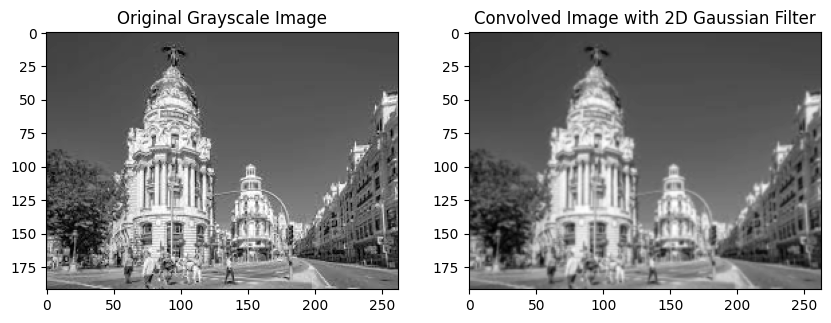

In [5]:
# Function to generate a 2D Gaussian kernel
def gaussian_kernel(size,sigma):
    kernel = np.zeros((size,size))
    center = size // 2
    sum_val = 0
    for i in range(size):
        for j in range(size):
            x,y = i-center,j-center
            kernel[i,j] = np.exp(-(x**2 + y**2) / (2.0 * sigma**2))
            sum_val += kernel[i,j]
    
    return kernel / sum_val

# Load the image and convert to grayscale
image = cv2.imread('madrid.jpg', cv2.IMREAD_GRAYSCALE)

# Generate and display the 2D Gaussian Kernel
kernel_size = 5                                             # 5x5 kernel
sigma = 0.7                                                 # Standard deviation for the Gaussian
gaussian_kernel_2d = gaussian_kernel(kernel_size,sigma)
print("Gaussian Kernel (5x5): \n", gaussian_kernel_2d)

# Apply the Gaussian filter to the image using OpenCV'S filter2D
smoothed_image = cv2.filter2D(image,-1,gaussian_kernel_2d)

# Display the original and smoothed images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.title("Original Grayscale Image")
plt.subplot(1,2,2)
plt.imshow(smoothed_image,cmap='gray')
plt.title("Convolved Image with 2D Gaussian Filter")
plt.show()

### Explication

A small sigma will preserve more detail because the filter is less aggresive. If you choose a sigma close to 0, for example 0.1, the image will not lose valuable detail. However, if you choose a sigma up to 0.7, you will start to notice the filter because the image loses detail. In my opinion, a sigma equal 1 is correct because you will notice the filter but it will not be too much. 

### ***Fifth question***

**Gaussian Pyramid Construction:** Compute a Gaussian pyramid for an input image and display the pyramid layers. Scale the pyramid layers to the size of the original image for comparison. Report what you observe in the successive pyramid layers.

Number of pyramid layers: 3
Layer 0 shape: (192, 263)
Layer 1 shape: (96, 132)
Layer 2 shape: (48, 66)


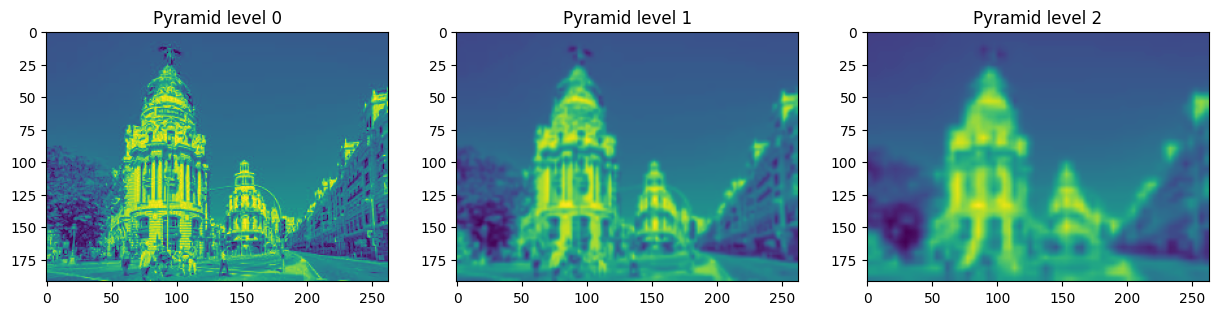

In [6]:
# Compute Gaussian pyramid
def gaussian_pyramid(image,levels=3):
    aux = image
    pyramid = [image]
    for i in range(1,levels):
        aux = cv2.pyrDown(aux)
        pyramid.append(aux)
    return pyramid

# Display pyramid with resized layers
pyramid_layers = gaussian_pyramid(image)
print("Number of pyramid layers:",len(pyramid_layers))
for i in range(len(pyramid_layers)):
    print(f"Layer {i} shape:",pyramid_layers[i].shape)
resized_pyramid_layers = [cv2.resize(layer,(image.shape[1],image.shape[0])) for layer in pyramid_layers]

# Display results
plt.figure(figsize=(15,5))
for i, layer in enumerate(resized_pyramid_layers):
    plt.subplot(1,len(resized_pyramid_layers), i + 1)
    plt.imshow(layer)
    plt.title(f"Pyramid level {i}")

plt.show()

### Report

Level 0 contains the highest resolution image, in succesive pyramid layers the resolution of the images are reduced. At level 1 smaller details are still identifiable, however, they begin to disappear. At level 2, the image is signigicantly blurred, the resolution reduced to (48,66) compared to the original (192,263). Only the larger structures remain visible.  

### ***Sixth question***

**Image Gradients and Histogram of Gradient Directions:** Compute and display the image gradients for a given graysclae test image. Display gradients only above a certain magnitude. Then, compute and plot a histogram of the gradient directions. Use simple test images (e.g square or circle) to verify the correctness of your implementation.

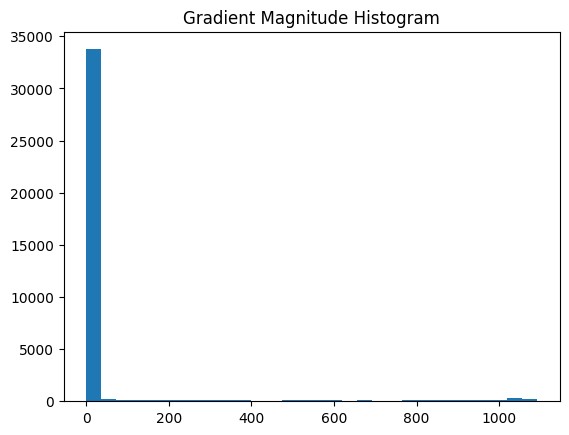

In [7]:
# Load the image
image = cv2.imread('circle.png', cv2.IMREAD_GRAYSCALE)

# Compute gradients
grad_x = cv2.Sobel(image,  cv2.CV_32F,1, 0, ksize=3)
grad_y = cv2.Sobel(image,  cv2.CV_32F,0, 1, ksize=3)
magnitude = np.sqrt(grad_x**2 + grad_y**2)
direction = np.arctan2(grad_y,grad_x)

# Draw gradient vectors
image_with_vectors = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
threshold = 100
strong_magnitudes = magnitude > threshold
y_coords, x_coords = np.where(strong_magnitudes)

# Draw gradient vectors (arrows) on the image
for y,x in zip(y_coords,x_coords):
    dx = int(grad_x[y,x] / 10)
    dy = int(grad_y[y,x] / 10)
    start_point = (x,y)
    end_point = (x + dx,y + dy)
    cv2.arrowedLine(image_with_vectors,start_point,end_point,(0,0,255),1,tipLength=0.3)

# Displayt he image with gradient vectors
cv2.imshow("Image with gradient vectors",image_with_vectors)
plt.hist(magnitude.ravel(), bins=30)
plt.title("Gradient Magnitude Histogram")
plt.show()


### ***Seventh question***

**Gaussian Derivatives Gradients:** Implement separable Gaussian derivative convolution filters to compute the x and y derivatives of an image. For x derivatives, first, convolve the image with a horizontal Gaussian derivative filter in the x direction, and then convolve it with a vertical Gaussian smoothing filter in the y direction. For y derivatives, first, convolve the image with a vertical Gaussian derivative filter in the y direction. and then convolve it with a horizontal Gaussian smoothing in the x direction. Display the x and y derivatives of the image as two separate images.

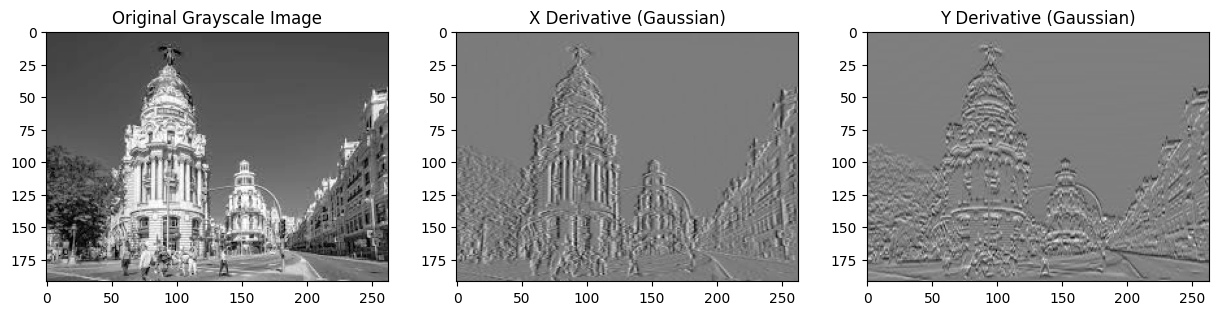

In [8]:
# Function to generate a 1D Gaussian kernel
def gaussian_1d(size,sigma):
    x = np.linspace(-size // 2, size // 2, size)
    kernel = np.exp(-(x**2) / (2.0 * sigma**2))
    kernel /= np.sum(kernel)
    return kernel

# Function to generate a 1D Gaussian derivative kernel
def gaussian_derivative_1d(size,sigma):
    x = np.linspace(-size // 2, size // 2, size)
    kernel = -x * np.exp(-(x**2) / (2.0 * sigma**2))
    kernel /= np.sum(np.abs(kernel))
    return kernel

# Compute 1D filters
gaussian_x = gaussian_1d(5,1.0).reshape(1,-1)
gaussian_y = gaussian_1d(5,1.0).reshape(-1,1)
gaussian_derivative_x = gaussian_derivative_1d(5,1.0).reshape(1,-1)
gaussian_derivative_y = gaussian_derivative_1d(5,1.0).reshape(-1,1)

# Load the image and conver it to grayscale
image = cv2.imread('madrid.jpg', cv2.IMREAD_GRAYSCALE)

# Detect X derivative (Separable convolution)
image_x_derivative = cv2.filter2D(image,cv2.CV_64F,gaussian_derivative_x)
# Detect Y derivative (Separable convolution)
image_y_derivative = cv2.filter2D(image,cv2.CV_64F,gaussian_derivative_y)
# Display the results
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.title("Original Grayscale Image")
plt.subplot(1,3,2)
plt.imshow(image_x_derivative,cmap='gray')
plt.title("X Derivative (Gaussian)")
plt.subplot(1,3,3)
plt.imshow(image_y_derivative,cmap='gray')
plt.title("Y Derivative (Gaussian)")
plt.show()

### ***Eighth question***

**Laplacian of Gaussian (LoG) Filtering:** Filter an image using a Laplacian of Gaussian (LoG) filter. Display the zero crossings of the LoG to detect edges. Demonstrate the correctness of the method with test images.

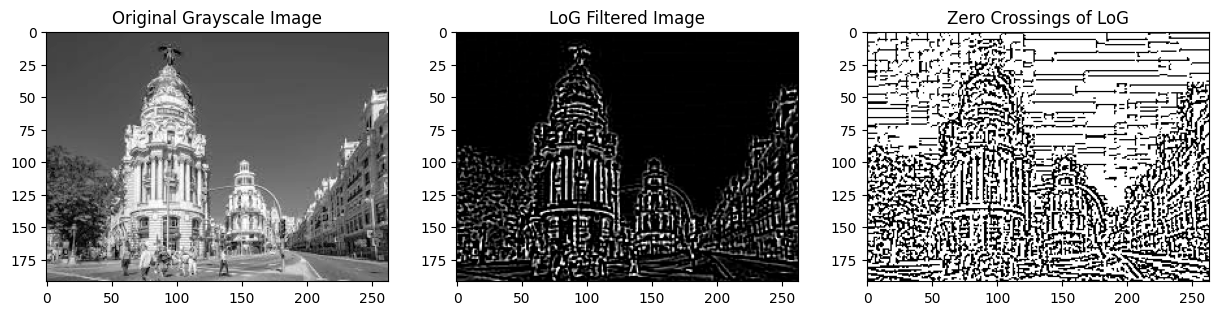

In [9]:
def laplacian_of_gaussian(size,sigma):
    kernel = np.zeros((size,size))
    center = size // 2
    for x in range(size):
        for y in range(size):
            x_val = x - center
            y_val = y - center
            kernel[x,y] = ((x_val**2 + y_val**2 - 2 * sigma**2) / sigma**4) * np.exp(-(x_val**2 + y_val**2) / (2 * sigma**2))
            kernel -= kernel.mean()
    return kernel

def apply_log(image,size,sigma):
    log_filter = laplacian_of_gaussian(size,sigma)
    log_filtered_image = cv2.filter2D(image,-1,log_filter)
    return log_filtered_image

# Detect zero crossing
def detect_zero_crossing(log_image):
    # Define the 1D filters for horizontal and vertical derivatives
    horizontal_filter = np.array([[-1,1]])          # Horizontal 1x2 filter
    vertical_filter = np.array([[-1],[1]])          # Vertical 2x1 filter

    # Convolve the image with the horizontal and vertical filters
    horizontal_edges = cv2.filter2D(log_image,-1,horizontal_filter)
    vertical_edges = cv2.filter2D(log_image,-1,vertical_filter)

    # Detect zero crossings by checking for sign changes between adjacent pixels
    zero_crossings = np.zeros_like(log_image)
    zero_crossings[(horizontal_edges > 0) & (horizontal_edges < 0)] = 1
    zero_crossings[(vertical_edges > 0) & (vertical_edges < 0)] = 1
    zero_crossings[(horizontal_edges == 0) & (vertical_edges == 0)] = 1

    return zero_crossings

# Load the image and convert it to grayscale
image = cv2.imread('madrid.jpg', cv2.IMREAD_GRAYSCALE)

# Apply the Laplacian of Gaussian filter
size = 5                                    # 5x5 kernel
sigma = 1.0                                 # Standard deviation for the Gaussian
log_filtered_image = apply_log(image,size,sigma)
zero_crossings = detect_zero_crossing(log_filtered_image)  

# Display the original image, loG-filtered image, and zero crossings
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.title("Original Grayscale Image")
plt.subplot(1,3,2)
plt.imshow(log_filtered_image,cmap='gray')
plt.title("LoG Filtered Image")
plt.subplot(1,3,3)
plt.imshow(zero_crossings,cmap='gray')
plt.title("Zero Crossings of LoG")
plt.show()